<a href="https://colab.research.google.com/github/hyeonjun0909/Pimp-my-rmd/blob/master/Titanic_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.style.use('fivethirtyeight')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
import io
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
df_train = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))

In [ ]:
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
for col in df_train.columns:
  msg = 'columns : {:>10} \t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
  print(msg)

columns : PassengerId 	 Percent of NaN value: 0.00%
columns :   Survived 	 Percent of NaN value: 0.00%
columns :     Pclass 	 Percent of NaN value: 0.00%
columns :       Name 	 Percent of NaN value: 0.00%
columns :        Sex 	 Percent of NaN value: 0.00%
columns :        Age 	 Percent of NaN value: 19.87%
columns :      SibSp 	 Percent of NaN value: 0.00%
columns :      Parch 	 Percent of NaN value: 0.00%
columns :     Ticket 	 Percent of NaN value: 0.00%
columns :       Fare 	 Percent of NaN value: 0.00%
columns :      Cabin 	 Percent of NaN value: 77.10%
columns :   Embarked 	 Percent of NaN value: 0.22%


In [ ]:
for col in df_train.columns:
  msg = 'columns : {:>10} \t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
  print(msg)

columns : PassengerId 	 Percent of NaN value: 0.00%
columns :   Survived 	 Percent of NaN value: 0.00%
columns :     Pclass 	 Percent of NaN value: 0.00%
columns :       Name 	 Percent of NaN value: 0.00%
columns :        Sex 	 Percent of NaN value: 0.00%
columns :        Age 	 Percent of NaN value: 19.87%
columns :      SibSp 	 Percent of NaN value: 0.00%
columns :      Parch 	 Percent of NaN value: 0.00%
columns :     Ticket 	 Percent of NaN value: 0.00%
columns :       Fare 	 Percent of NaN value: 0.00%
columns :      Cabin 	 Percent of NaN value: 77.10%
columns :   Embarked 	 Percent of NaN value: 0.22%


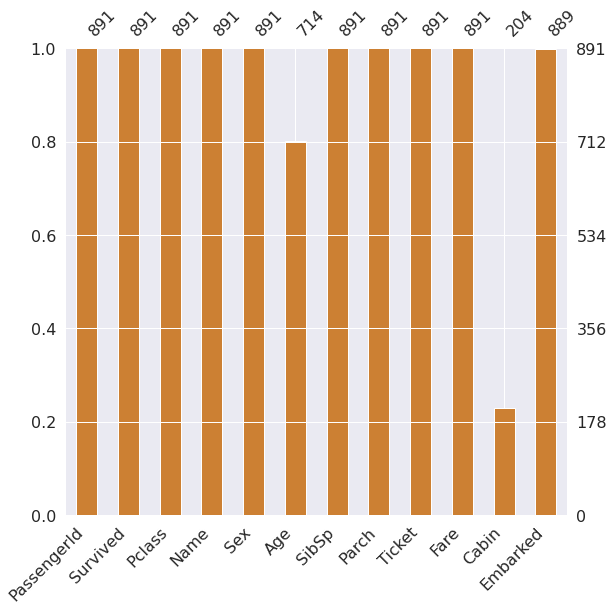

In [ ]:
msno.bar(df=df_train, figsize=(8, 8), color = (0.8, 0.5, 0.2))

Text(0.5, 1.0, 'Count plot - Survived')

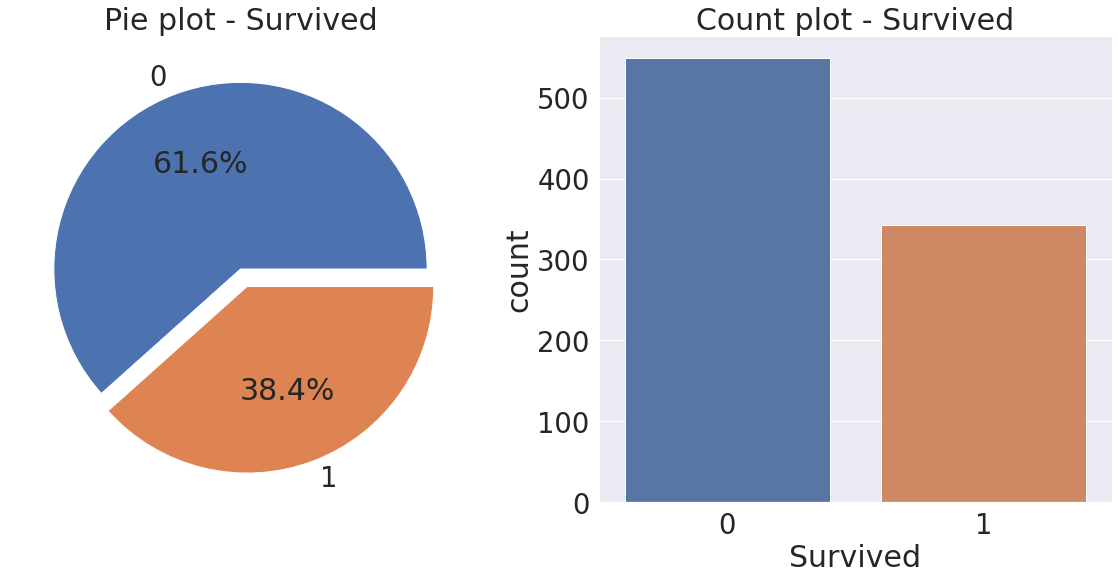

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

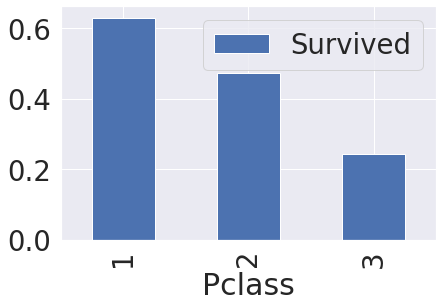

In [ ]:
df_train[['Pclass', 'Survived']].groupby('Pclass', as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

In [ ]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='cool')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 1.02, 'Pcass: Survived vs Dead')

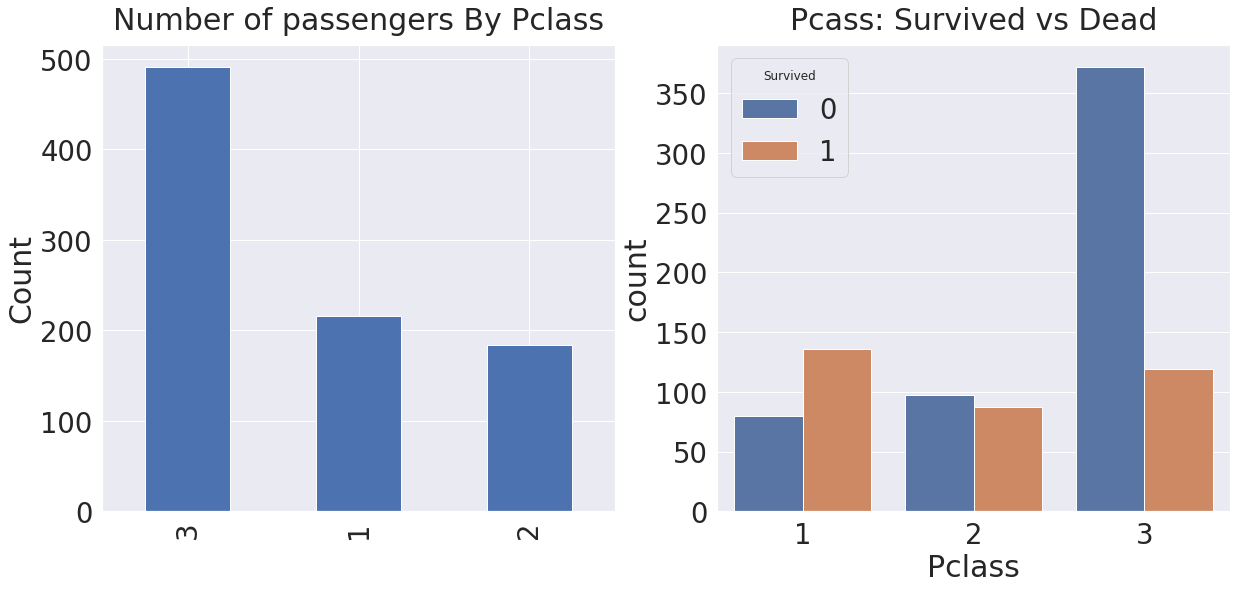

In [ ]:
y_position = 1.02
f, ax = plt.subplots(1,2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pcass: Survived vs Dead', y=y_position)


Text(0.5, 1.0, 'Sex: Survived vs Dead')

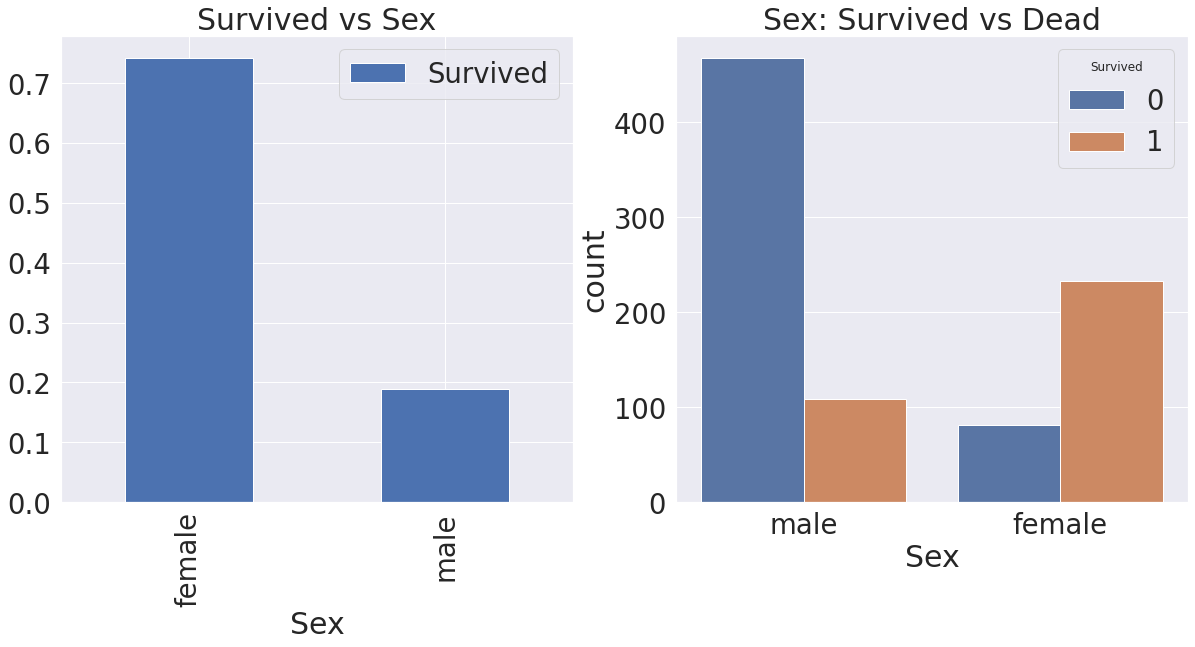

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train[['Sex', 'Survived']].groupby('Sex', as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

In [ ]:
df_train[['Sex', 'Survived']].groupby('Sex', as_index=True).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [ ]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


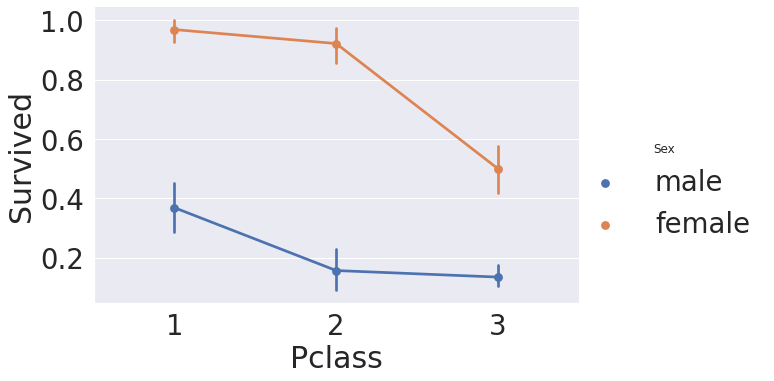

In [ ]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

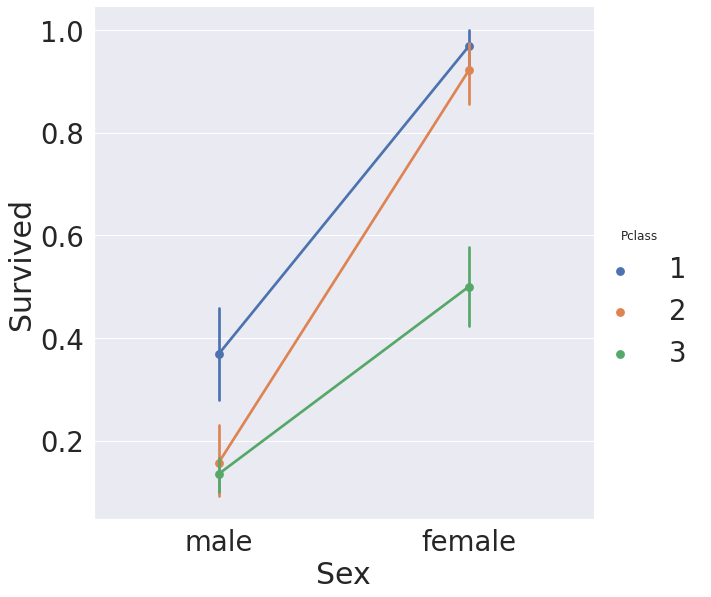

In [ ]:
sns.factorplot(x='Sex', y='Survived', hue='Pclass', data=df_train, saturation=.5, size=9, aspect=1)

In [ ]:
print('제일 나이 많은 탑승객 : {:.1f} years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 years
제일 어린 탑승객 : 0.4 years
탑승객 평균 나이 : 29.7 years


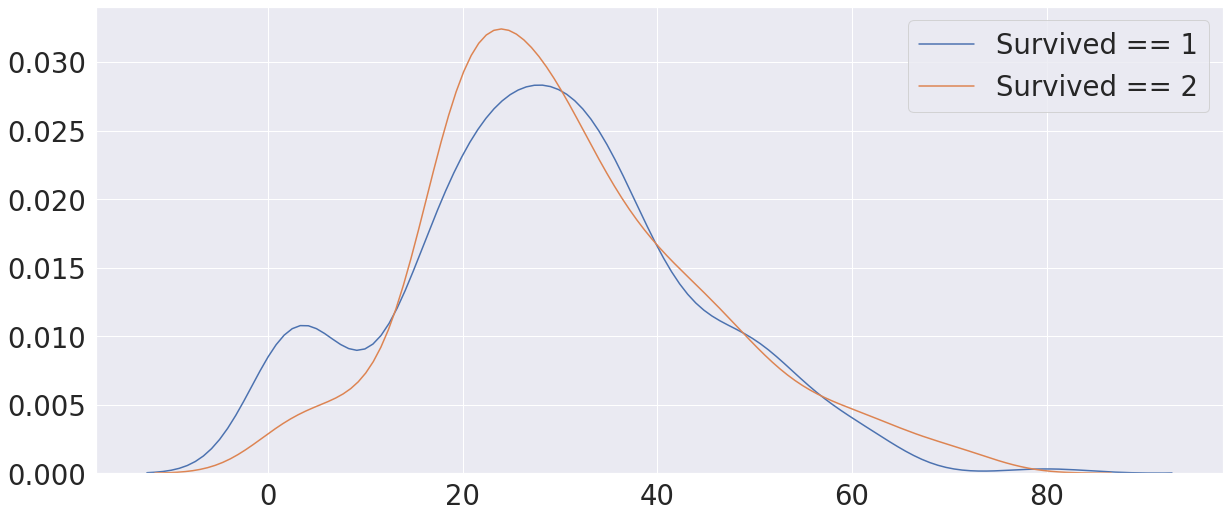

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(18, 8))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 2'])

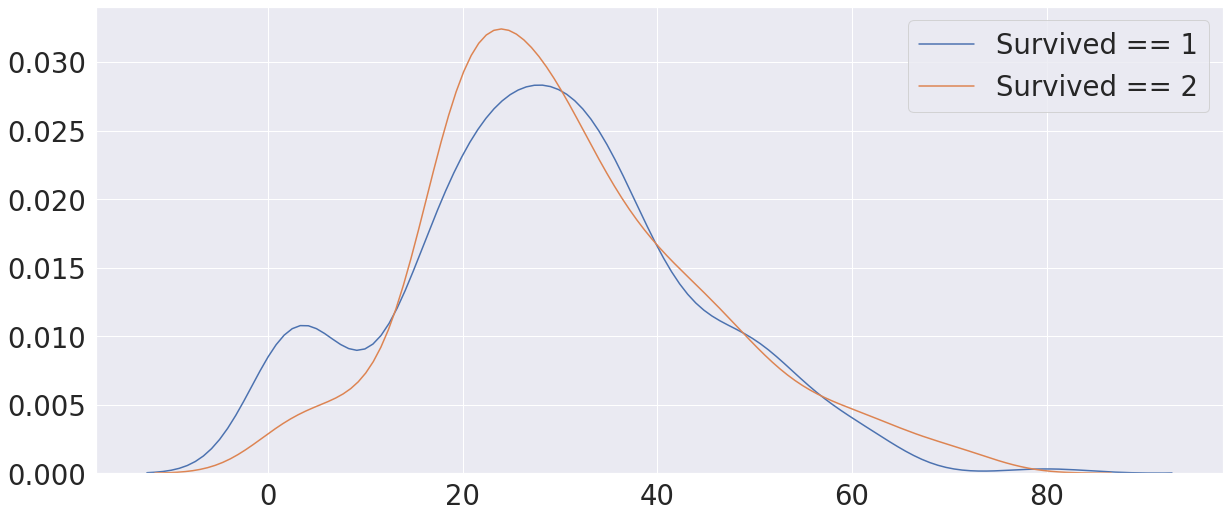

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(18, 8))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 2'])

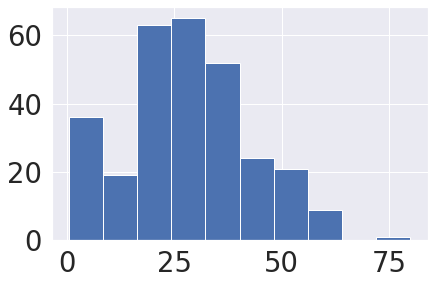

In [ ]:
df_train[df_train['Survived'] == 1]['Age'].hist()

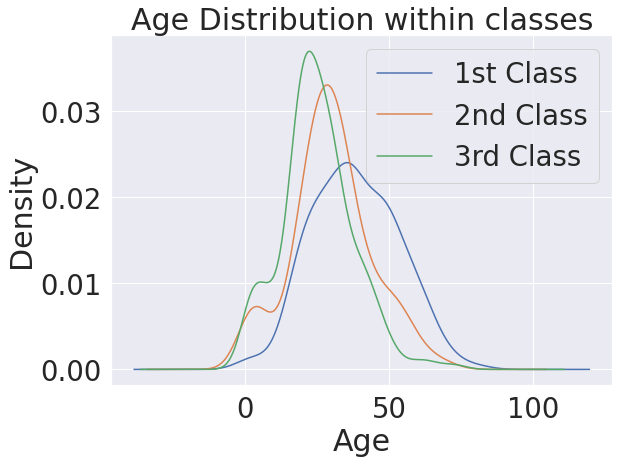

In [ ]:
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

Text(0.5, 0, 'label')

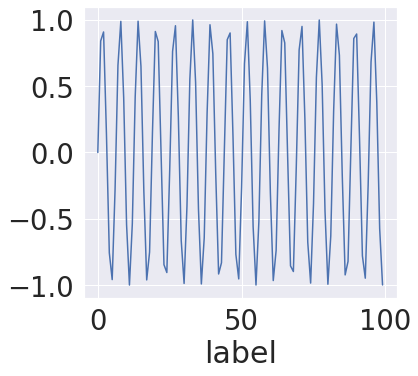

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
a = np.arange(100)
b = np.sin(a)

ax.plot(b)
ax.set_xlabel('label')

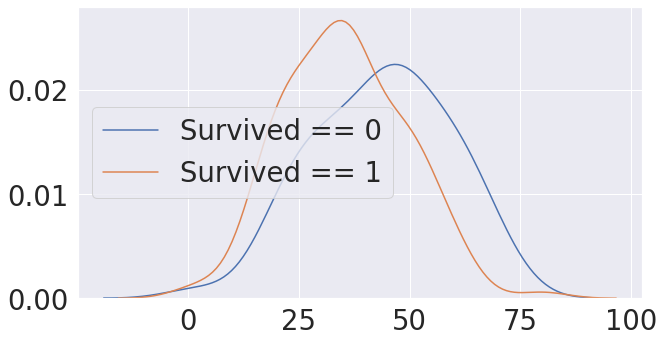

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 1)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 1)]['Age'], ax=ax)
plt.legend(['Survived == 0', 'Survived == 1'])


Text(0.5, 1.0, 'Survived Num of Pclass == 1')

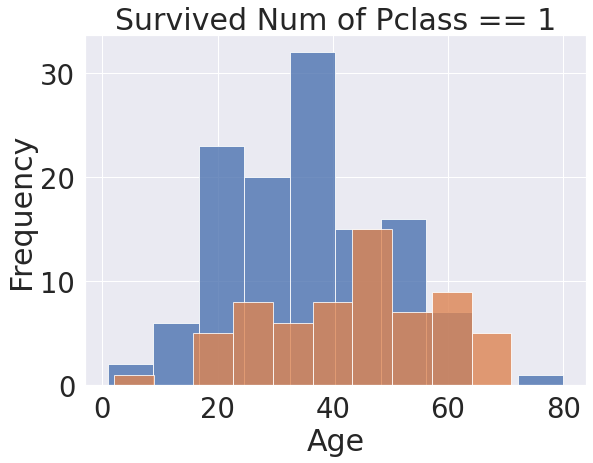

In [ ]:
plt.figure(figsize=(8, 6))
df_train['Age'][(df_train['Survived'] == 1) & (df_train['Pclass'] == 1)].plot.hist(alpha=0.8)
df_train['Age'][(df_train['Survived'] == 0) & (df_train['Pclass'] == 1)].plot.hist(alpha=0.8)
plt.xlabel('Age')
plt.title('Survived Num of Pclass == 1')

Text(0.5, 1.0, 'Survival Cumulative distribution')

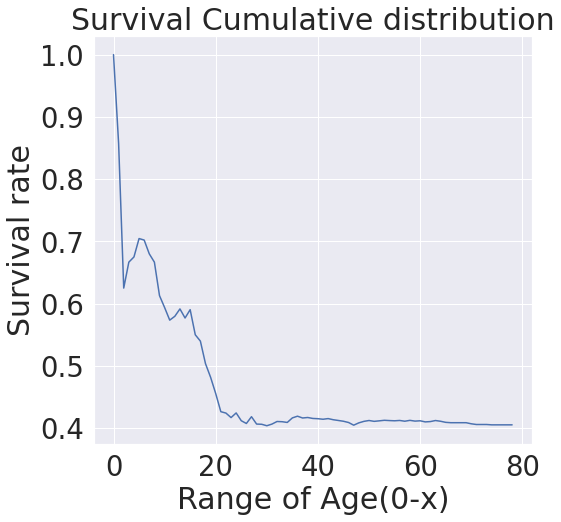

In [ ]:
change_age_range_survival_ratio = []

for i in range(1, 80):
  change_age_range_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7, 7))
plt.plot(change_age_range_survival_ratio)
plt.xlabel('Range of Age(0-x)')
plt.ylabel('Survival rate')
plt.title('Survival Cumulative distribution')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

import warnings

warnings.filterwarnings('ignore')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
import io

uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
data = pd.read_csv(io.StringIO(uploaded['train.csv'].decode('utf-8')))

In [ ]:
for col in data.columns:
  print('Column: {:<10} \t Percen of NaN value: {:.2f}%'.format(col, 100 * data[col].isnull().sum() / data[col].shape[0]))

Column: PassengerId 	 Percen of NaN value: 0.00%
Column: Survived   	 Percen of NaN value: 0.00%
Column: Pclass     	 Percen of NaN value: 0.00%
Column: Name       	 Percen of NaN value: 0.00%
Column: Sex        	 Percen of NaN value: 0.00%
Column: Age        	 Percen of NaN value: 19.87%
Column: SibSp      	 Percen of NaN value: 0.00%
Column: Parch      	 Percen of NaN value: 0.00%
Column: Ticket     	 Percen of NaN value: 0.00%
Column: Fare       	 Percen of NaN value: 0.00%
Column: Cabin      	 Percen of NaN value: 77.10%
Column: Embarked   	 Percen of NaN value: 0.22%


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The Age Cabin and Embarked have null values i will try to fix them

# How many Survived?

In [ ]:
'a' + 'b'

'ab'

In [ ]:
data['Survived'].value_counts() ## value_counts()는 null value를 제외한다

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
data['Cabin'].value_counts(dropna=False)

NaN            687
G6               4
B96 B98          4
C23 C25 C27      4
F2               3
              ... 
A20              1
D11              1
B102             1
A14              1
T                1
Name: Cabin, Length: 148, dtype: int64

Text(0.5, 1.0, 'Survived')

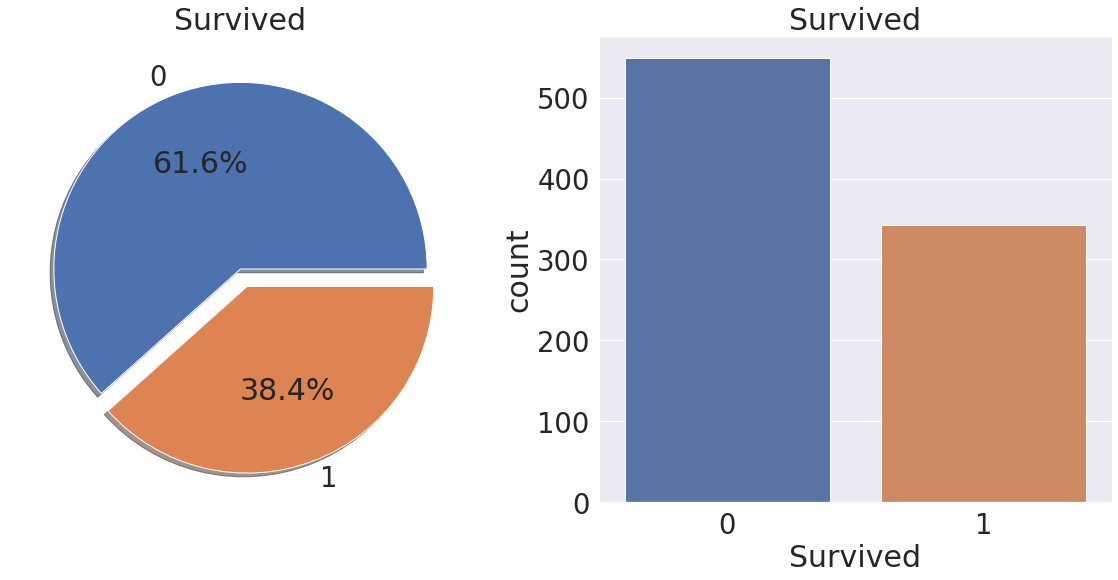

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')

Text(0.5, 1.0, 'Pclass')

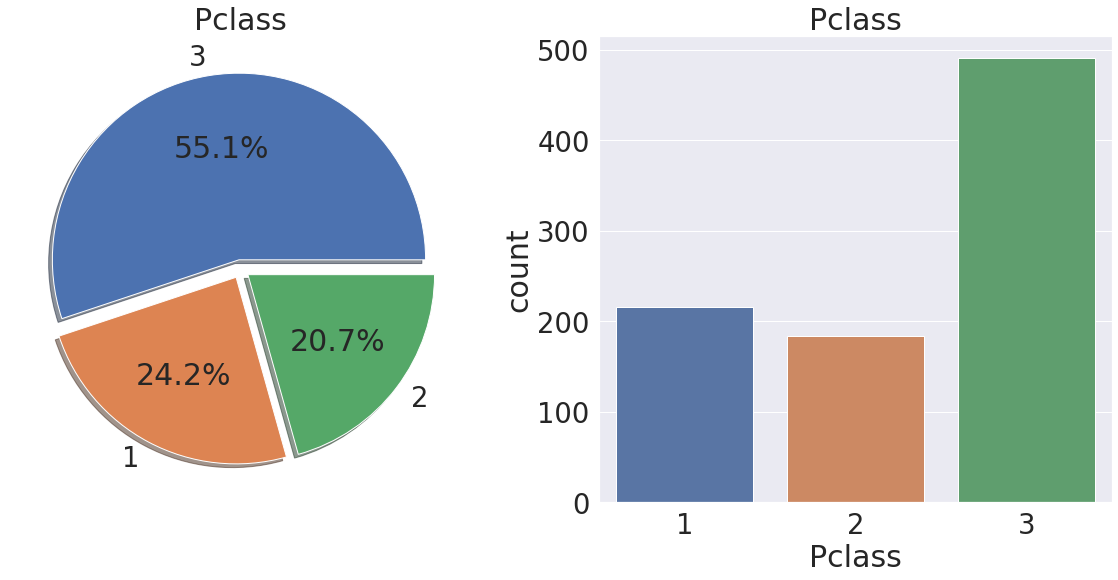

In [ ]:
tem_col = 'Pclass'
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data[tem_col].value_counts().plot.pie(explode=[0.05, 0.05, 0.05], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title(tem_col)
ax[0].set_ylabel('')

sns.countplot(tem_col, data=data, ax=ax[1])
ax[1].set_title(tem_col)

- It is evident that not many passengers survived the accident.

- Out of 891 passengers in training set, 
only around 250 survived i.e. Only 38.4% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passenger did survived an who didnt't.

- We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex. Port of Embarcation, Age, etc.

First let us understand the different types of feature.

# Type Of Features

- Categorical Features
- A categorical variable is one that has two or more categories and each value in that feature can be categorized by them.

- For example, gender is a categorical variable having two categories. (male and female)

- Now we cannot sort or give any ordering to such variables.

- Ordinal Features


- An ordinal variable is similar to categorical values. But the difference between them is that we can have relative ordering or sorting between the values.

- If we have a feature like height, which values are tall, medium, short, then height is a ordinal variable.

# Categorical variable

- A조 : 한국 독일 스웨덴 멕시코
- B조 : 스페인 브라질 덴마크 잉글랜드
- C조 : 일본 이란 네덜란드 프랑스

# Ordinal variable
- A: Tall
- B: Medium
- C: Short

# Encoding methods

- Label encoding
- one hot encoding
- frequency encoding
- mean encoding 

Ordinal variable이라면 Label encoding만 쓰면 되고, Categorical variable이면 one hot encoding, frequency encoding 또는 mean encoding을 추가적으로 사용해야함.

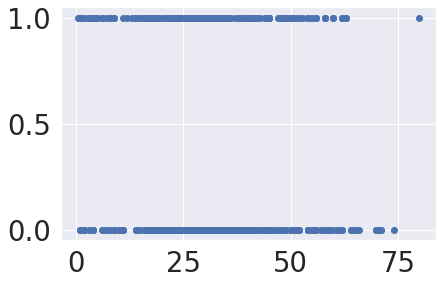

In [ ]:
plt.scatter(data.loc[data['Age'].notnull(), 'Age'], data.loc[data['Age'].notnull(), 'Survived'])

In [ ]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Sex: Survived vs Dead')

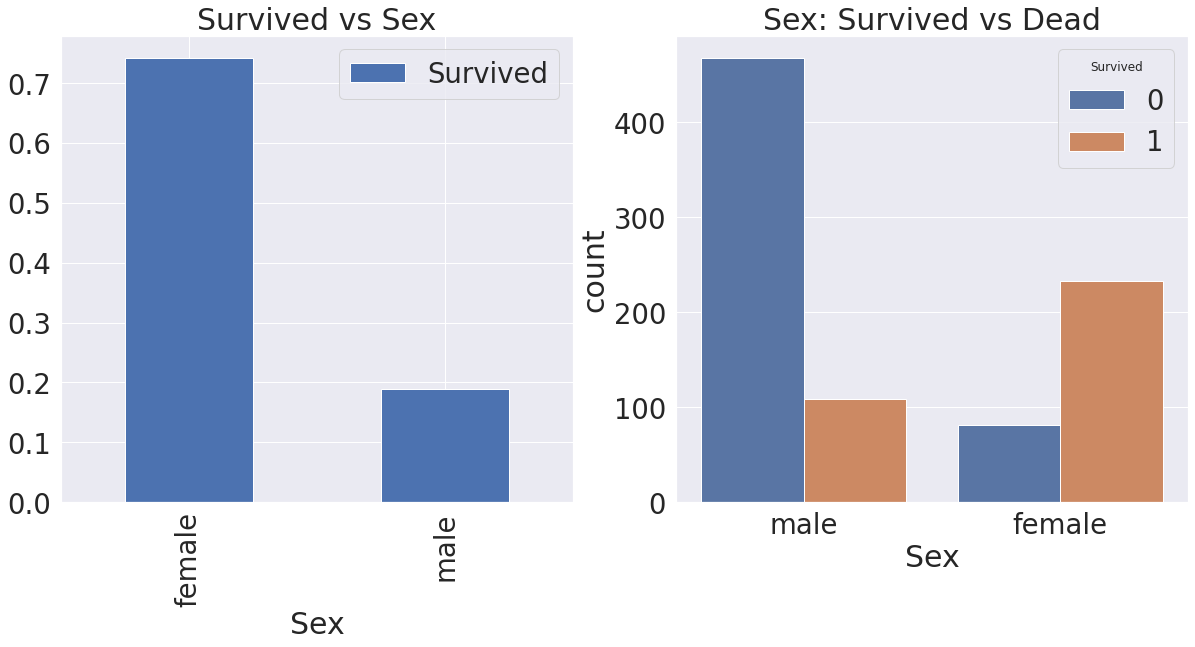

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

- This looks interesting. The number of men on the ship is lot more than the number of women.

Still the number of women saved is almost twice the number of males saved.

- The survival rate for a women on the ship is around 75% while that for men is around 18-19%.

In [ ]:
plt.style.use('ggplot')
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 1.0, 'Survived by Pclass')

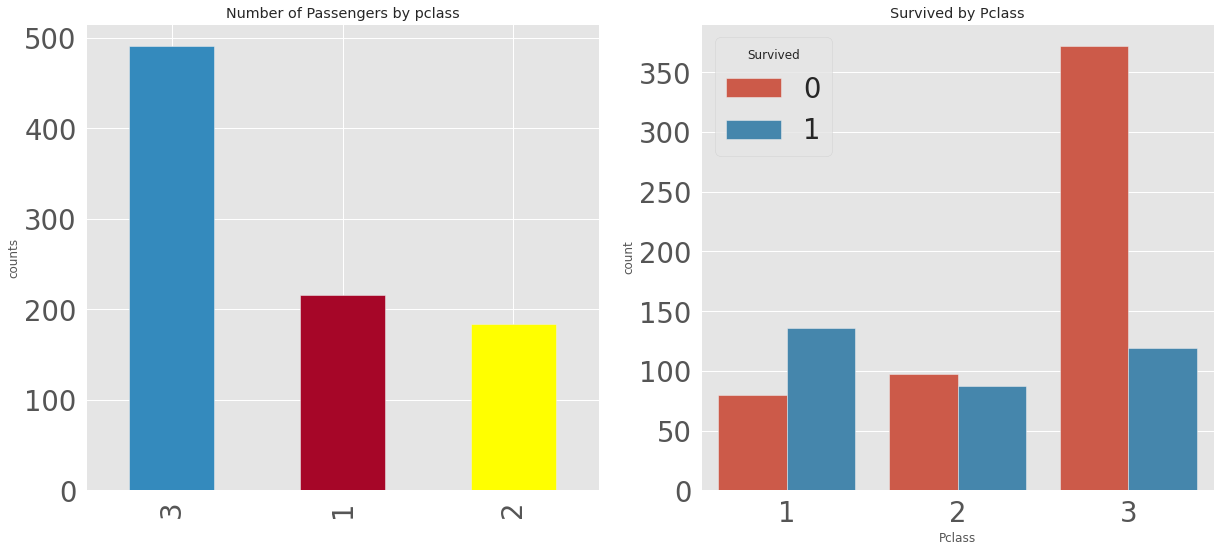

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data.Pclass.value_counts().plot.bar(ax=ax[0], color=['#348ABD', '#A60628', 'Yellow'])
ax[0].set_title('Number of Passengers by pclass')
ax[0].set_ylabel('counts')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Survived by Pclass')

- People say Money can't buy everything. But we can clearly see that Passengers of pclass 1 were given a very high priority while rescue.

- Even though the number of passenger in pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.

- For Pclass 1 survived is around 63% while for Pclass2 is around 48%.
- Mony and status matters. Such a materialistic world.
- Let dive in little bit more and check for other interest observations. 

In [ ]:
pd.crosstab(data['Sex'], data['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


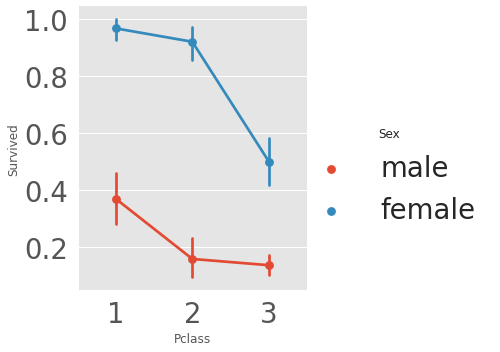

In [ ]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)

- Looking at the Crosstab and there factorplot, we can easily infer that survival for women from pclass1 is about 95-96% as only 3 out of 94 women from pclass1 dead

It is evident that irrespective of Pclass, women were given first priority whhile rescue. Even men from pclass1 have very low survival rate.


## Age, Continuous Feature

In [ ]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')

Oldest Passenger was of: 80.0 Years


In [ ]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Text(0, 0.5, 'count')

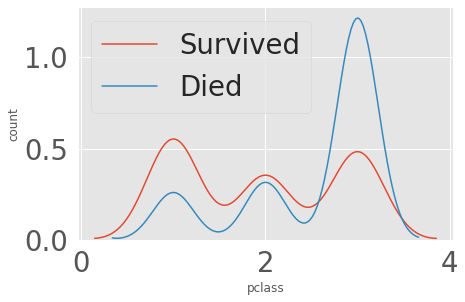

In [ ]:
sns.kdeplot(data.loc[data['Survived'] == 1, 'Pclass'], label='Survived')
sns.kdeplot(data.loc[data['Survived'] == 0, 'Pclass'], label='Died')
plt.xlabel('pclass')
plt.ylabel('count')

Text(0.5, 1.0, 'Sex and Age vs Survived')

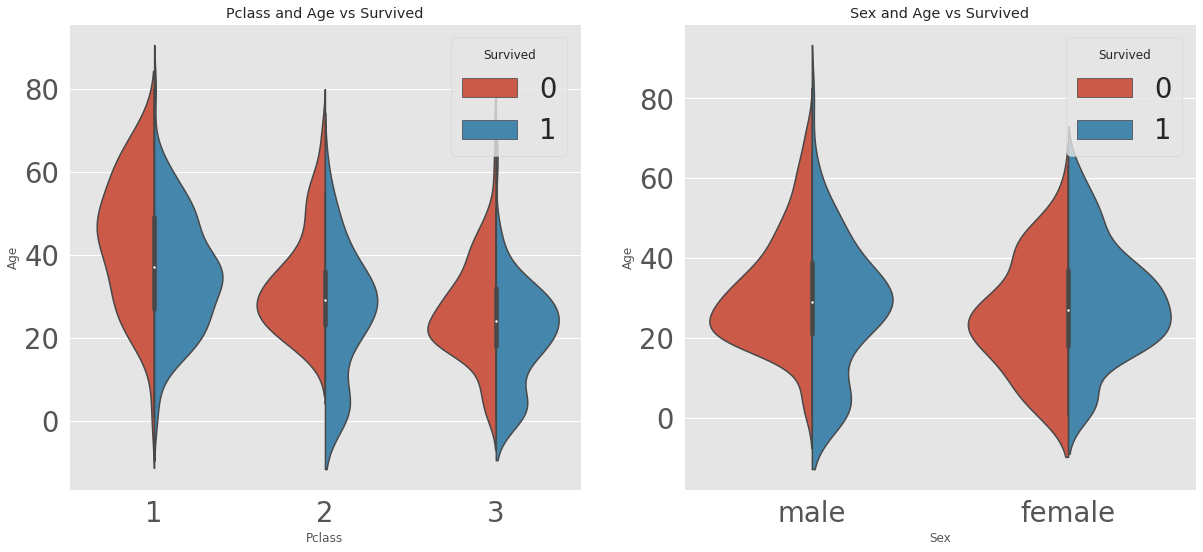

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')

sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')

1) The number of children increases with Pclass and the survival rate for passengers below Age 10 looks to be good irrespective of the Pclass.


2) Survival chances for passenger  20-50 from pcalss 1 is high and is even better for women.

3) For males, the survival chances decrease with an increase in age.

- As we had seen ealrier, the age feature 177 null values.

- To replace these NaN values, we can assign them the mea age of the dataset

- But the problem is there were many people with many different ages.

- We just can't assign a 4 year kid with the mean age that is 29 years.
- Is there any way to find out what age-band does the passengerier?

- Bingo! we can check the Name feature, Looking upon the feature, we can see that the names have a salutation.

Thus we can assign the mean values of Mr and Mrs to the respective groups.

In [ ]:
"Whats in A name"

In [ ]:
data['Initial'] = 0

In [ ]:
for i in data:
  data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [ ]:
data['Initial']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Initial, Length: 891, dtype: object

- Okay so here we are using Regex [A-Aa-z] + ). So what it does is, it looks for string which lie between A-Z or a-z and followed by a.(dot) So we successfully extract the initials from the Names.


In [ ]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


- Okay so there are some misspelled initials like Mlle or Mme that stand for Miss. I will repalce them with Miss and same thing for other values.

In [ ]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [ ]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [ ]:
data.loc[(data.Age.isnull()) & (data['Initial'] == 'Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data['Initial'] == 'Miss'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data['Initial'] == 'Maseter'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data['Initial'] == 'Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data['Initial'] == 'Other'), 'Age'] = 46

In [ ]:
for col in data.columns:
  print('Columns: {:<10} \t Number of NaN value: {:.1f}%'.format(col, 100 * data[col].isnull().sum() / data[col].shape[0]))

Columns: PassengerId 	 Number of NaN value: 0.0%
Columns: Survived   	 Number of NaN value: 0.0%
Columns: Pclass     	 Number of NaN value: 0.0%
Columns: Name       	 Number of NaN value: 0.0%
Columns: Sex        	 Number of NaN value: 0.0%
Columns: Age        	 Number of NaN value: 6.4%
Columns: SibSp      	 Number of NaN value: 0.0%
Columns: Parch      	 Number of NaN value: 0.0%
Columns: Ticket     	 Number of NaN value: 0.0%
Columns: Fare       	 Number of NaN value: 0.0%
Columns: Cabin      	 Number of NaN value: 77.1%
Columns: Embarked   	 Number of NaN value: 0.2%
Columns: Initial    	 Number of NaN value: 0.0%


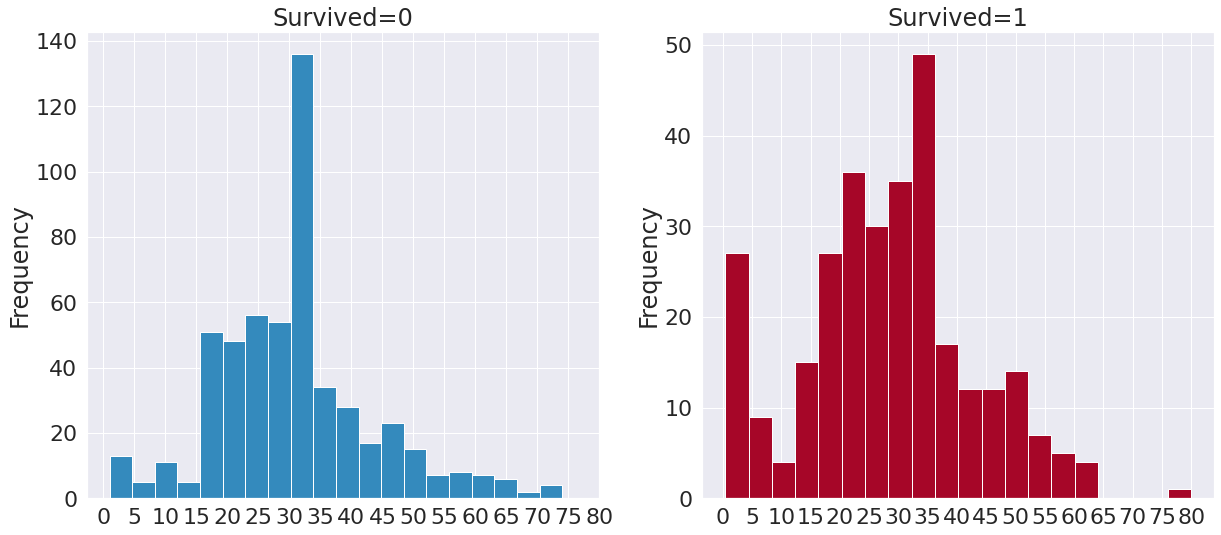

In [ ]:
sns.set(font_scale=2)

f, ax = plt.subplots(1,2 , figsize=(18, 8))
data.loc[data['Survived'] ==0]['Age'].plot.hist(ax=ax[0], bins=20, color='#348ABD')
ax[0].set_title('Survived=0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)

data[data['Survived']==1]['Age'].plot.hist(ax=ax[1], bins=20, color='#A60628')
ax[1].set_title('Survived=1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)

- Observations

- The Toddler (age < 5) were saved in large numbers(The women and child first policy)
- The oldest Passenger was saved. (80 years)

- Maximum number of deaths were in the age group of 30-40

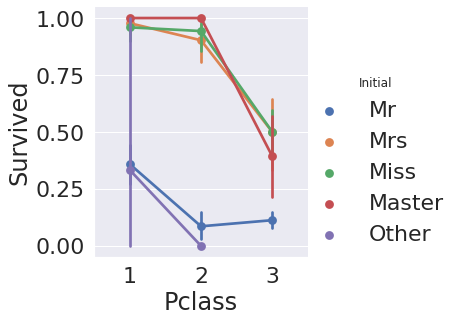

In [ ]:
sns.factorplot('Pclass', 'Survived', hue='Initial', data=data)

The women and child first policy thus holds true irrespective of the class.

In [ ]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

<Figure size 1296x576 with 0 Axes>

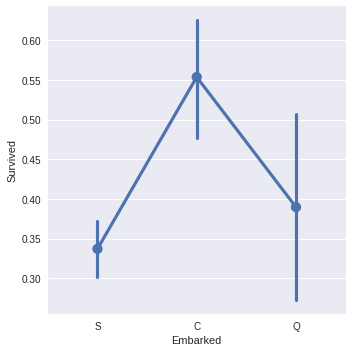

In [ ]:
plt.figure(figsize=(18, 8))

sns.factorplot('Embarked', 'Survived', data=data)


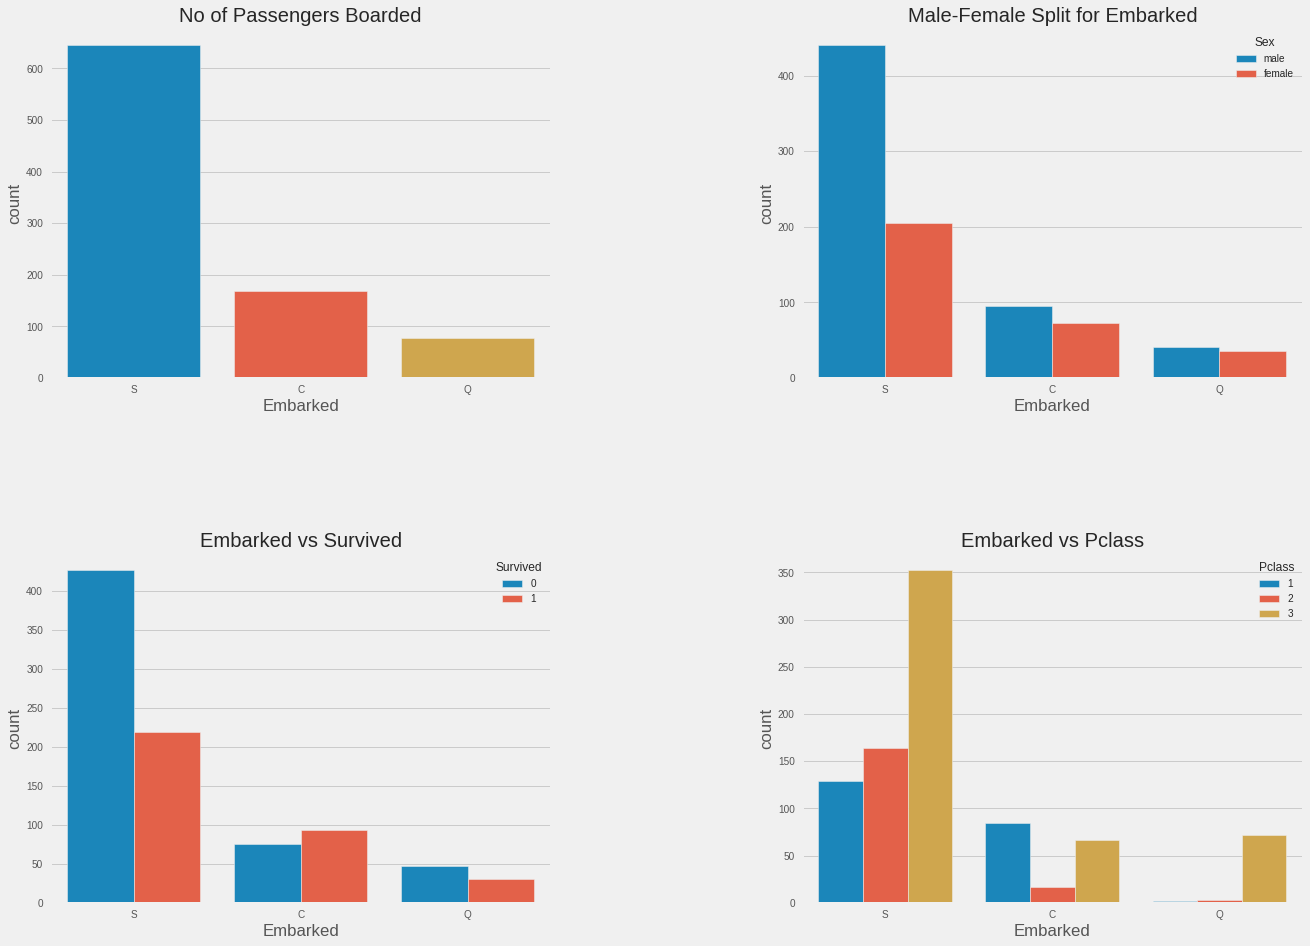

In [ ]:
f, ax = plt.subplots(2, 2, figsize=(20,15))

sns.countplot('Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('No of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1, 1])
ax[1, 1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.5, hspace=0.5)

- Observation

- Maximum passengers boarded from S. Majority of the being from pclass3


- The passengers from C look to be lucky as a good proportion of them survived.

- The reason for this maybe the recue of all the Pclass1, and Pclass passengers

- Post Q had almost 95% of the passenger were from Pclass3.

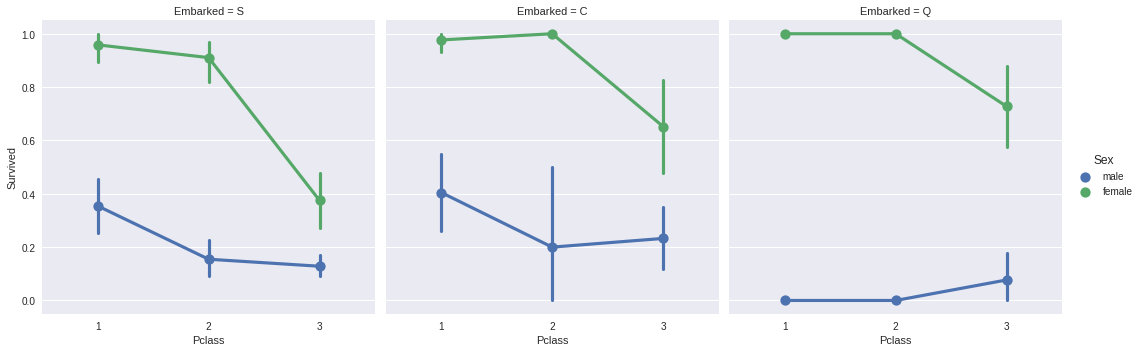

In [ ]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)

- The survival chances are almost 1 for women for Pclass1 and Pclass2 irrespective of the Pclass.

- Post S looks to be very unlucky for Pclass3 Passengers as the survival rate for both men and women is very low.

- Port Q looks to be unlucky for men, as almost all were from Pclass3

- As we saw that maximum passengers boarded from Port S, we replace NaN with S.

In [ ]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
data['Embarked'].fillna('S', inplace=True)

In [ ]:
data['Embarked'].isnull().sum()

0

## SibSp

- The feature represents whether a person is alone or with his family members.

In [ ]:
pd.crosstab(data.SibSp, data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


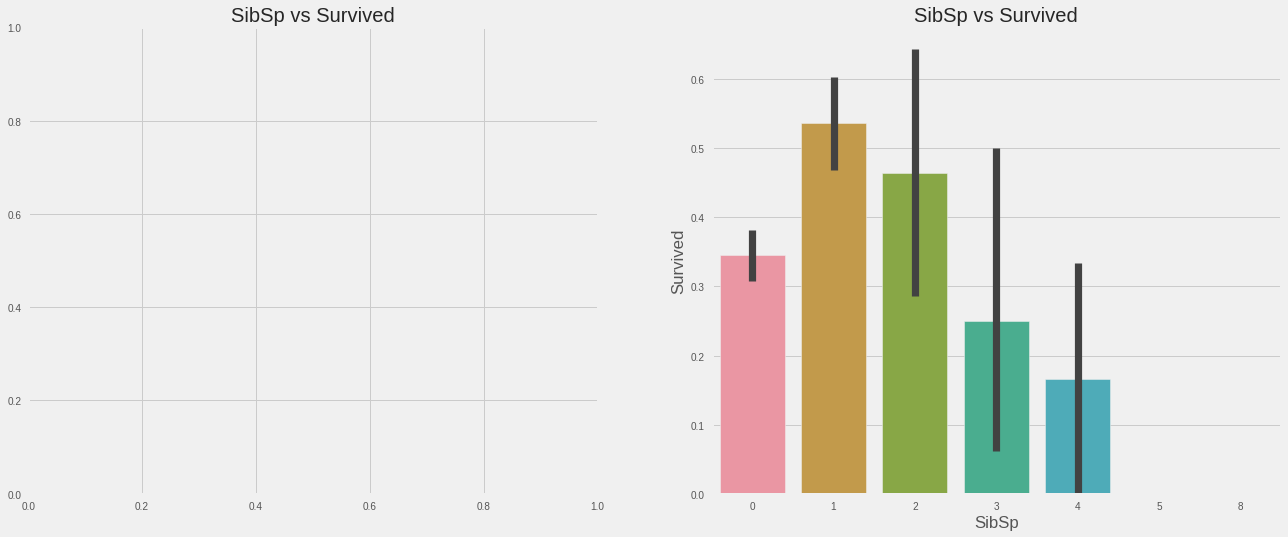

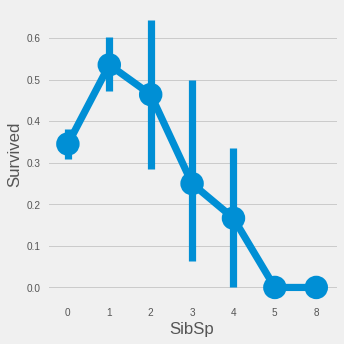

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.factorplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.barplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.show()

In [ ]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


# Observation
- The barplot and factorplot shows that if a passenger is alone onboard with no sibling, he has 34.5% suviva rate.
- The graph roughly decrease the number of silblings increase
- This makes sense. That is if I have a family on board, I will try to save them, instead of saving myself first. Surprisingly the survival for families with 5-8 member is 0%.

- The reason is Pclass. The crosstab shows that persin with Sibsp > 3 were all in Pclass3. It is imminent that all the large families in Pclass3 (>3) died.

In [ ]:
pd.crosstab(data['Parch'], data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


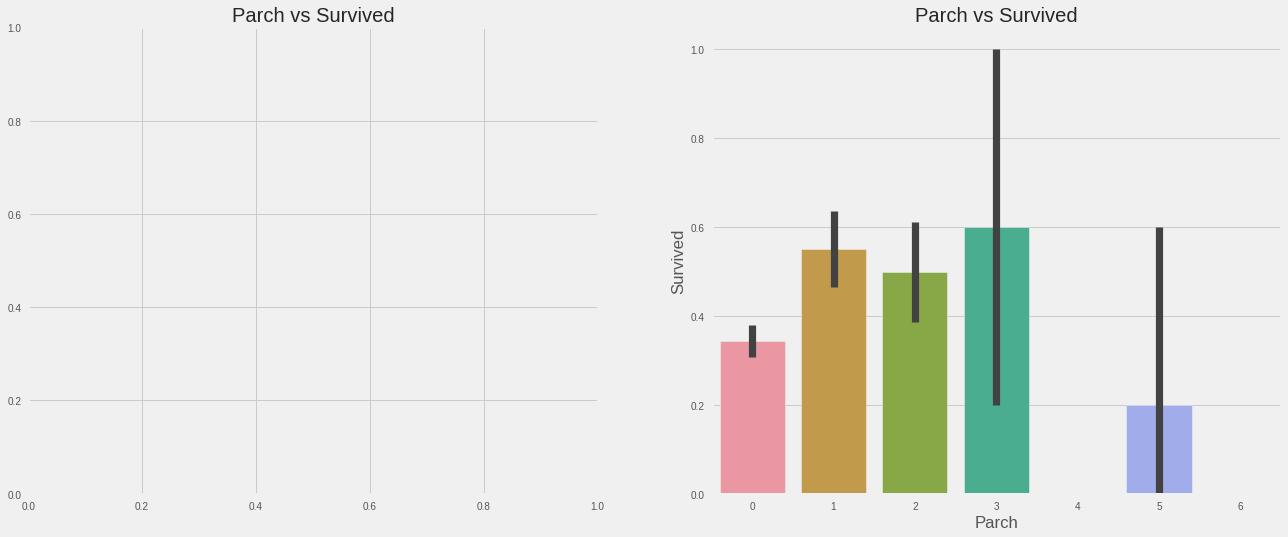

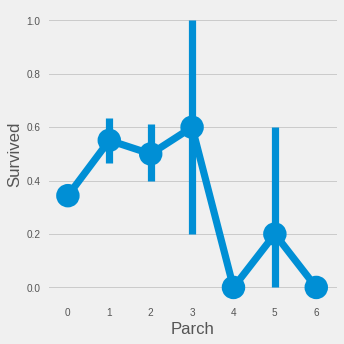

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.factorplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.barplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.show()

- Here too, the result are quite similar.
- Passengers with their parents onboard have greater chance of survival.
- The chance of survival is good for somebody who has 1-3 parents(children) on the ship.
- Being alone also proves to be fatal and the chances for survival decreases, when sombody has >4 parents(children) on the ship.

- Pcalss1 female
- S and C Port
- SibSp > 3

In [ ]:
data['new_cat_pclass_sex'] = data['Pclass'].astype(str) + '_' + data['Sex']

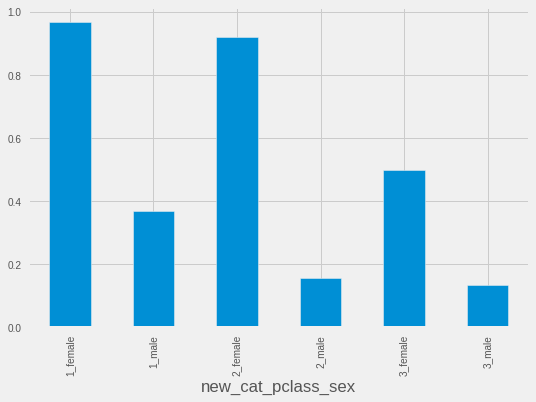

In [ ]:
data.groupby('new_cat_pclass_sex')['Survived'].mean().plot.bar()

## Fare, Continuous feature

In [ ]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


The lowest fare is 0.0. Wow! a free luxrious ride.

(0.0, 500.0)

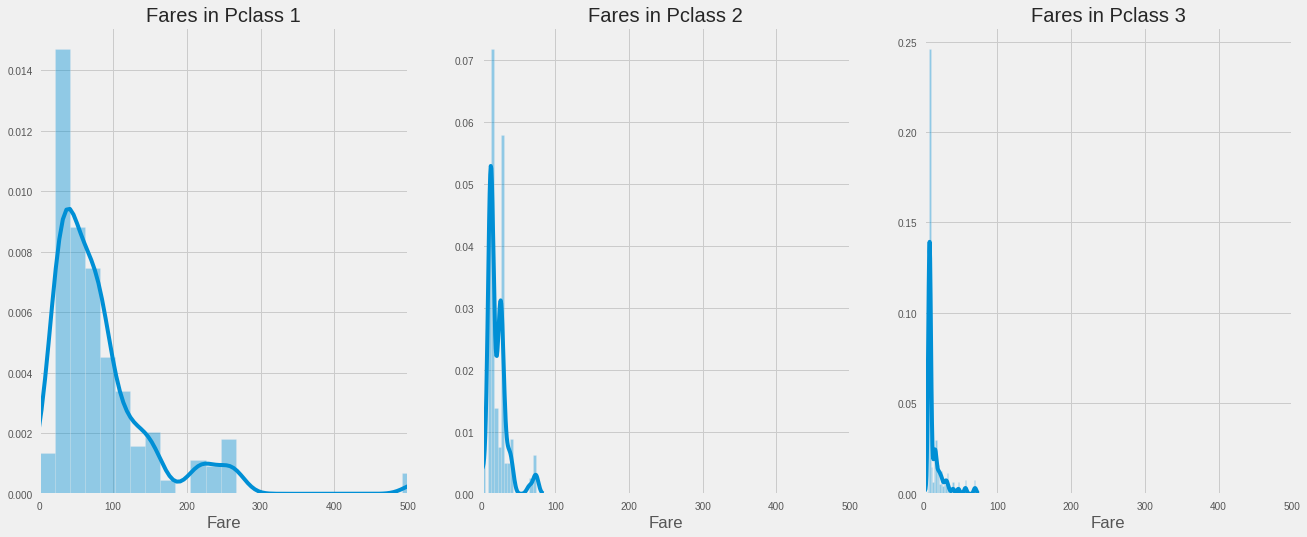

In [ ]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.distplot(data[data.Pclass == 1]['Fare'], ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
ax[0].set_xlim([0, 500])

sns.distplot(data[data.Pclass == 2]['Fare'], ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
ax[1].set_xlim([0, 500])

sns.distplot(data[data.Pclass == 3]['Fare'], ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
ax[2].set_xlim([0, 500])


-  There looks to be a large distribution in the fares of Passengers in pclass1 and this distribution goes on decreasing as the standards reduces. As this is also continuous, we can convert into discrete values by using bining.

# Observations in a Nutshell for all features
Sex: The chance of survival for women is high as compared to men.

Pclass:There is a visible trend that being a 1st class passenger gives you better chances of survival. The survival rate for Pclass3 is very low. For women, the chance of survival from Pclass1 is almost 1 and is high too for those from Pclass2. Money Wins!!!.

Age: Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

Embarked: This is a very interesting feature. The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S. Passengers at Q were all from Pclass3.

Parch+SibSp: Having 1-2 siblings,spouse on board or 1-3 Parents shows a greater chance of probablity rather than being alone or having a large family travelling with you.

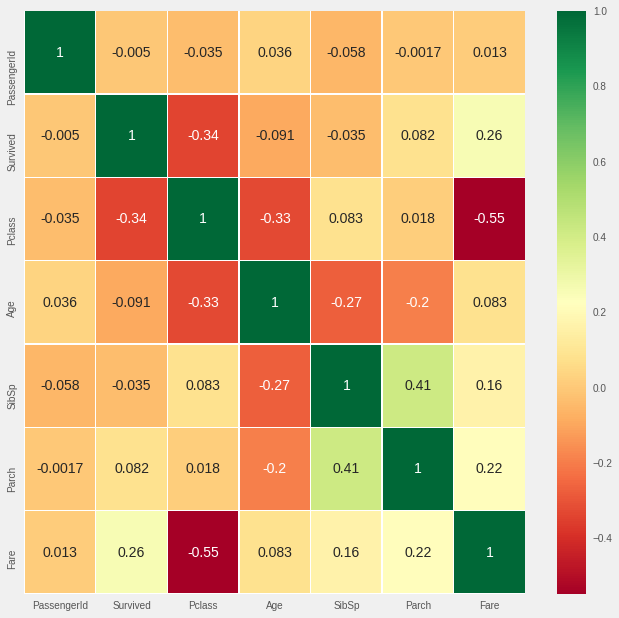

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=.3)

- Interpreting this Heatmap
- The first thing to note is that only the numeric features are compared as it is obviousthat we cannot corelate between alphabets or strings. Before understanding the plot, let us see what examtply correlation is.
- Positive correlation: If an increases in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.
- Negative correlation: if an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value -1 means perfect negative correlation.

- Now lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other.
- This means that both the feature are containing highly similar

- This is known as Multicolinearity as both of them contains almost the same information.

- So do you think we should use both of them as one of them is redundant.

- While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantage.

- Now  from the above, we can see that the features are not much correlated. The highest correlation is between SibSp and Parch i.e 0.41.

- End done!

## Feature Engineering

- Now what is feature engineering?

- Whenever we are given a dataset with features, it is not necessary that all the features will be important.
- There may be redundant features which should be eliminated.Also we can get or add new features by observing or extracting information from other features.

- An example would be getting initial features using the Name feature.
- Let's see if we can get any new feature and eliminate a few. Also we will transfrom the existing relevant features to suitable form for predictive modeling.


# Age band

- Problem with age features
- As I have mentioned earlier that Age is a continous features, there is a problem with Continuous features in machine learning models.
- If I say to group or arrange spots person by Sex, We can easily segragate them by Male and Female
- Now if I say to group them by their age, then how would you do it? If there are 30 persons, there may be 30 are values. Now this is problems.

- We need to convert these continuous values in to categorical values by either bining or namalization. I will use bining group a range of ages into a single bin or assigh them a values.
- Okay so the maximum age of a passenger was 80. So lets divide the range from 0-80 into 5 bins.

In [ ]:
data['Age_band'] = 0
data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band'] = 3
data.loc[data['Age'] > 64, 'Age_band'] = 4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,new_cat_pclass_sex,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,3_male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1_female,2


In [ ]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age_band
1,346
2,308
0,157
3,69
4,11


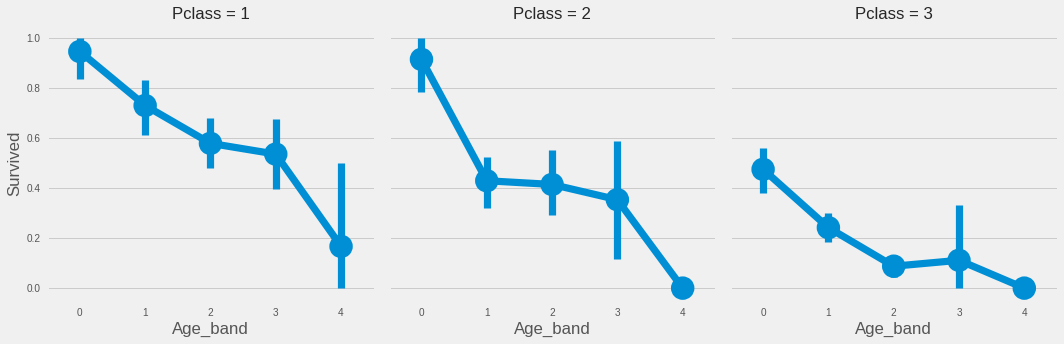

In [ ]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')

- Family size an alone
- At this point, we can create a new feature called "Family_size' and 'alone' and analyze it.
- this feature is the summation of Parch and SibSp. It gives use a combined data so that we can checl if survival rate have anything to do with family size of the passengers.
- Alone will denote whether a passenger is alone or not

In [ ]:
data['Family_size'] = 0
data['Family_size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data.Family_size==0, 'Alone'] = 1

Text(0.5, 1.0, 'Alone cs Survived')

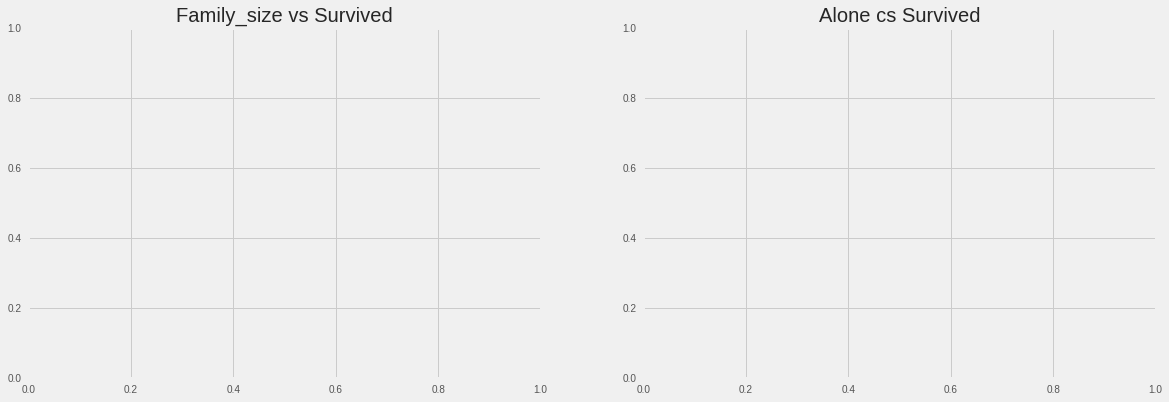

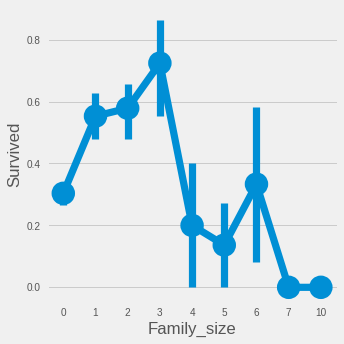

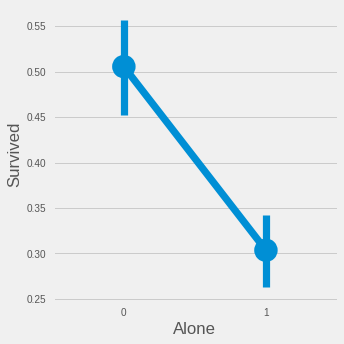

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.factorplot('Family_size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_size vs Survived')

sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone cs Survived')

- Family_size = 0 means that the passenger is alone

- Clearly if you are alone or family_size = 0, then chances for survival is very low. For Family_size > 4, the chances decrease too. This also looks to be an important feature for the model. Let's examine this further.

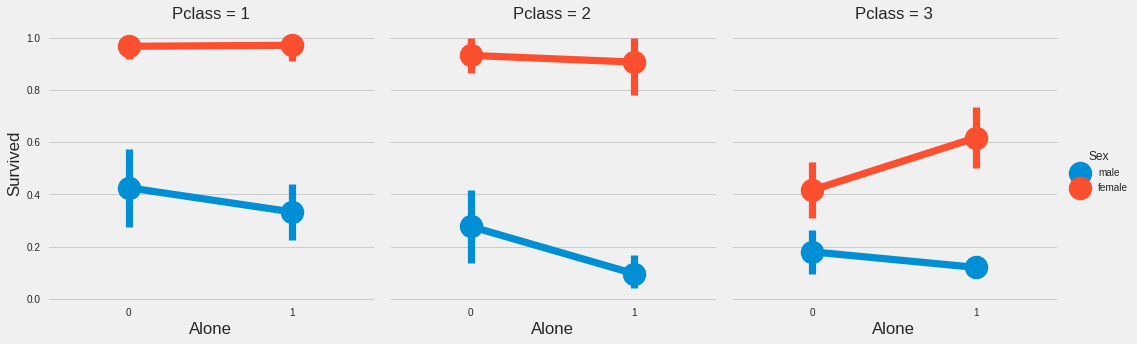

In [ ]:
plt.style.use('fivethirtyeight')
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')

- It is visible that being alone is harmful ireespective of Sex or Pclass except for Pclass3 where the chance of females who are alone is higher than those with family.

# Fare_range

- Since fare is also a continuous feature, we need to convert it into ordinal value.
- For this we will use pandas.qcut
- So what qcut does is it splits or arranges values according the number of bins we have expressed. So if we pass for 5 nins, it will arrange the values squally spaced into 5 separate bins or value range.

In [ ]:
data['Fare_range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [ ]:
data['Fare_range'] = pd.qcut(data['Fare'], 5) # pd.cut은 구간을 동일하게 pd.qcut은 quantile을 기준으로 나눈다.

In [ ]:
data['Fare_range'].value_counts()

(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: Fare_range, dtype: int64

In [ ]:
data[['Fare_range', 'Survived']].groupby('Fare_range')['Survived'].mean()

Fare_range
(-0.001, 7.854]      0.217877
(7.854, 10.5]        0.201087
(10.5, 21.679]       0.424419
(21.679, 39.688]     0.444444
(39.688, 512.329]    0.642045
Name: Survived, dtype: float64

In [ ]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

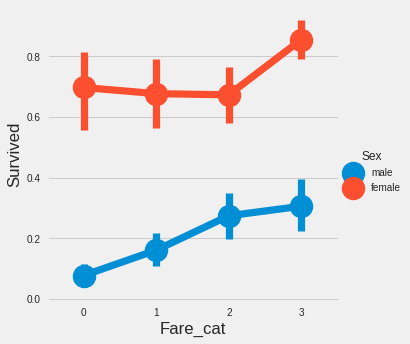

In [ ]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

- Clearly, as the fare_cut increases, the survival chances increases. This feature may become an important feature during modeling along with the Sex.
- Converting string values into numeric
- Since we cannot pass strings to a machine learning model, we need to convert features loke Sex, Embarked, etc into numeric values.

In [ ]:
from sklearn.preprocessing import LabelEncoder
cat_cols = [col for col in data.columns if data[col].dtypes == 'object']

In [ ]:
cat_cols

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Initial', 'new_cat_pclass_sex']

In [ ]:
for col in ['Sex', 'Embarked', 'Initial']:
  encoder = LabelEncoder()
  data[col] = encoder.fit_transform(data[col])

In [ ]:
indexer = {}
for col in ['Sex', 'Embarked', 'Initial']:
  _, indexer[col] = pd.factorize(data[col])

- Dropping Unneeded features

In [ ]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_range', 'PassengerId'], axis=1, inplace=True)

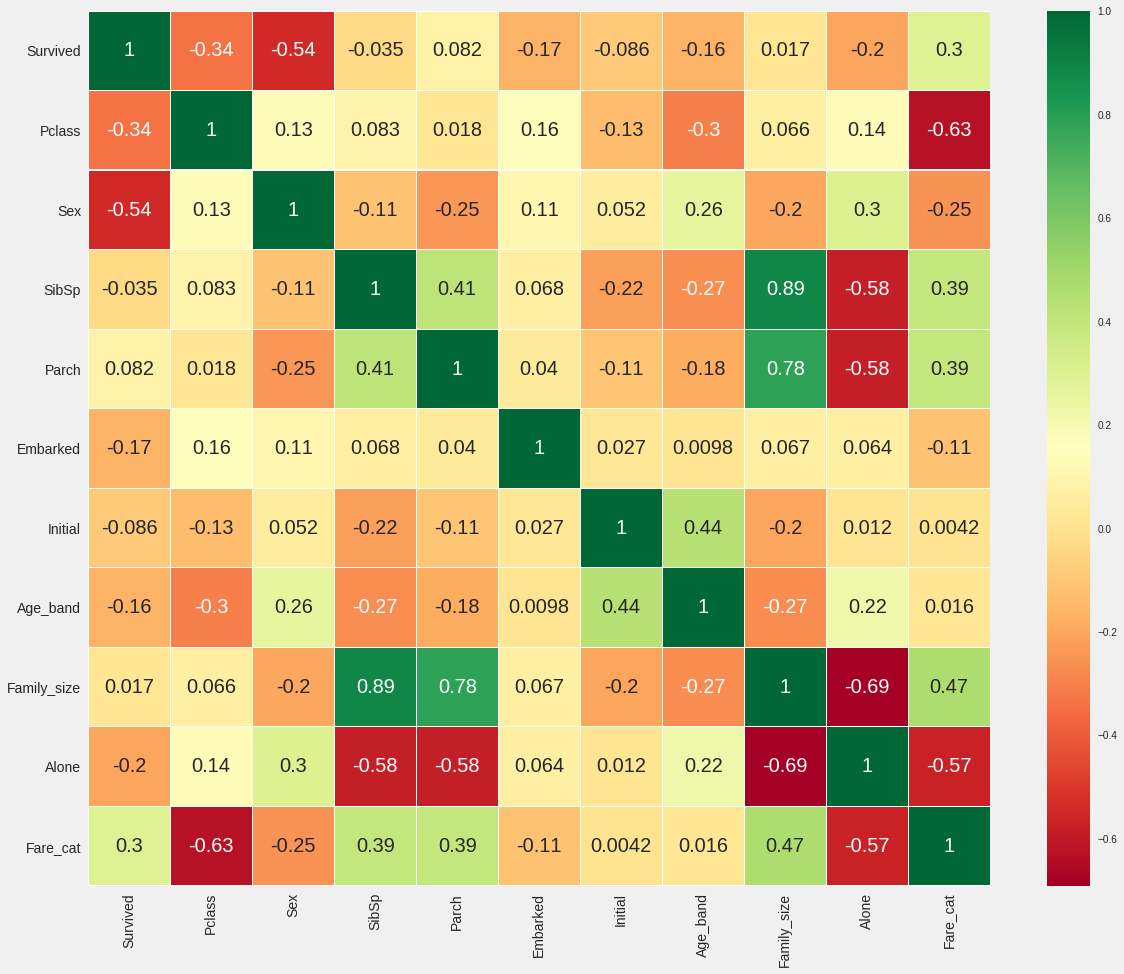

In [ ]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

- Now with the above correlation plot, we can see some positively related featrues.
- Some of them being SibSp and Family_Size and Parch and Family_Size and some negative ones like Alone and Family_Size.

- We have gained some insights from EDA part. But with that, we cannot accurately predict or tell whether a passenger will survive or die. So now we will predict the whether the passenger will survived or not using some greate classfication algorithm.

- Logistic regression
- Support vector machine (linear and radial)
- Random forest
- K-Nearest Neighbor
- Naive bayes
- Decision tree
- Log

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state=2019, stratify=data['Survived'])

In [ ]:
train['Survived'].value_counts() / train.shape[0]

0    0.616573
1    0.383427
Name: Survived, dtype: float64

In [ ]:
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]

test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]

X = data[data.columns[1:]]
Y = data['Survived']

# SVM

In [ ]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1, probability=True)
model.fit(train_X, train_Y)
prediction = model.predict_proba(test_X)
threshold = 0.4
prediction1 = (model.predict_proba(test_X)[:, 1] > threshold).astype(int)
print('Accuracy for rbf SVM is {:.2f}%'.format(100 * metrics.accuracy_score(prediction1, test_Y))) 

Accuracy for rbf SVM is 82.68%


Maximum index point: 0.29
Maximum Accuracy: 83.24%


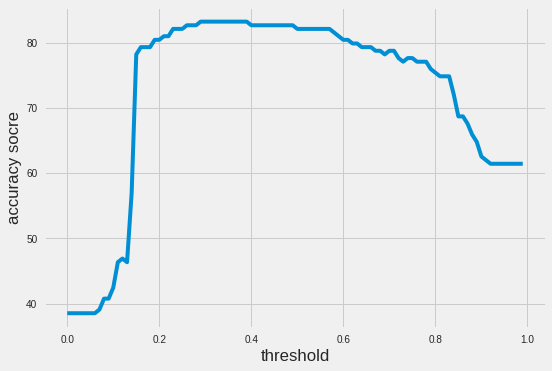

In [ ]:
score_array = []
for temp_tresh in np.arange(0, 1, 0.01):
  threshold = temp_tresh
  prediction = (model.predict_proba(test_X)[:, 1] > threshold).astype(int)
  temp_score = 100 * metrics.accuracy_score(prediction, test_Y)
  score_array.append(temp_score)

plt.plot(np.arange(0, 1, 0.01), score_array)
plt.xlabel('threshold')
plt.ylabel('accuracy socre')
print('Maximum index point:', np.arange(0, 1, 0.01)[np.argmax(score_array)])
print('Maximum Accuracy: {:.2f}%'.format(score_array[np.argmax(score_array)]))


# Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for Logistic Regression is {:.2f}%'.format(100 * metrics.accuracy_score(prediction2, test_Y))) 

Accuracy for Logistic Regression is 80.45%


Maximum index point: 0.49
Maximum Accuracy: 80.45%


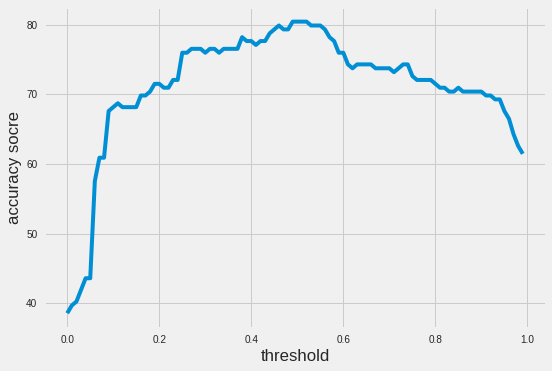

In [ ]:
score_array = []
for temp_tresh in np.arange(0, 1, 0.01):
  threshold = temp_tresh
  prediction2 = (model.predict_proba(test_X)[:, 1] > threshold).astype(int)
  temp_score = 100 * metrics.accuracy_score(prediction2, test_Y)
  score_array.append(temp_score)

plt.plot(np.arange(0, 1, 0.01), score_array)
plt.xlabel('threshold')
plt.ylabel('accuracy socre')
print('Maximum index point:', np.arange(0, 1, 0.01)[np.argmax(score_array)])
print('Maximum Accuracy: {:.2f}%'.format(score_array[np.argmax(score_array)]))


# Decision Tree

In [ ]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('Accuracy for Logistic Regression is {:.2f}%'.format(100 * metrics.accuracy_score(prediction3, test_Y))) 

Accuracy for Logistic Regression is 79.89%


Maximum index point: 0.43
Maximum Accuracy: 81.01%


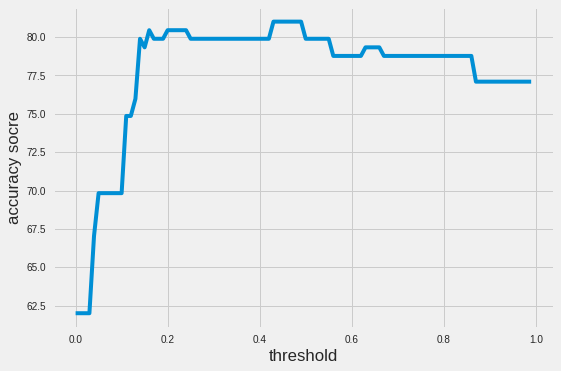

In [ ]:
score_array = []
for temp_tresh in np.arange(0, 1, 0.01):
  threshold = temp_tresh
  prediction3 = (model.predict_proba(test_X)[:, 1] > threshold).astype(int)
  temp_score = 100 * metrics.accuracy_score(prediction3, test_Y)
  score_array.append(temp_score)

plt.plot(np.arange(0, 1, 0.01), score_array)
plt.xlabel('threshold')
plt.ylabel('accuracy socre')
print('Maximum index point:', np.arange(0, 1, 0.01)[np.argmax(score_array)])
print('Maximum Accuracy: {:.2f}%'.format(score_array[np.argmax(score_array)]))


# K-Nearest Neighbor

- Now the accuracy for the KNN model changes as we change the values for n_eighbors attribute. The defalut value is 5. Let's check the accuracy over various value of n.

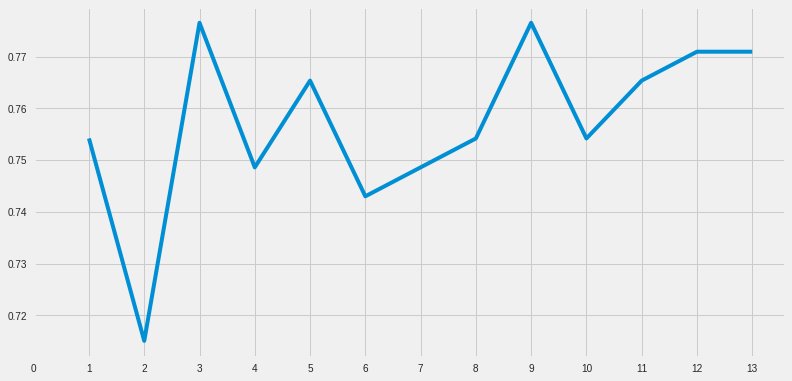

Accuracies for different values of n are: [0.75418994 0.7150838  0.77653631 0.74860335 0.76536313 0.74301676
 0.74860335 0.75418994 0.77653631 0.75418994 0.76536313 0.77094972
 0.77094972] with the max value as  0.776536312849162


In [ ]:
a_index = list(range(1, 14))
a = pd.Series()
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
for i in list(range(1, 14)):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(train_X, train_Y)
  prediction = model.predict(test_X)

  a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))

plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

# Random Forest

In [ ]:
model = RandomForestClassifier()
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('Accuracy for Logistic Regression is {:.2f}%'.format(100 * metrics.accuracy_score(prediction7, test_Y))) 

Accuracy for Logistic Regression is 81.01%


Maximum index point: 0.45
Maximum Accuracy: 82.12%


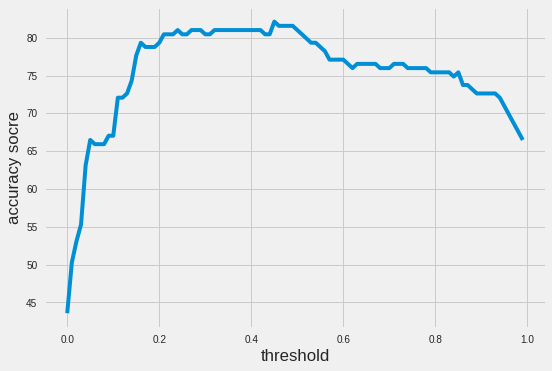

In [ ]:
score_array = []
for temp_tresh in np.arange(0, 1, 0.01):
  threshold = temp_tresh
  prediction7 = (model.predict_proba(test_X)[:, 1] > threshold).astype(int)
  temp_score = 100 * metrics.accuracy_score(prediction7, test_Y)
  score_array.append(temp_score)

plt.plot(np.arange(0, 1, 0.01), score_array)
plt.xlabel('threshold')
plt.ylabel('accuracy socre')
print('Maximum index point:', np.arange(0, 1, 0.01)[np.argmax(score_array)])
print('Maximum Accuracy: {:.2f}%'.format(score_array[np.argmax(score_array)]))


- The accuracy of a model is not the only factor that determines the robustness of the classifier.
- Let's say that a classifier is trained over a training data and tested over the test data and it score an accuracy of 90%.
- Now this seems to be very good accuracy for a classifier, but can we confirm that it will be 90% for all the new datasets that come over?
- The answer is No.
- As the training and testing data changes, the accuracy will also change. It may increase or decrease. This is known as model variance.

 - To overcome this and get a generalized model, we use cross validation.

- Many a times, the data is imbalanced i.e. there may be a high number of class1 instances but less number of their class instacnces.

- Thus we should train and test out algorithm on each and every instace of data.

- The K_Fold cross validation works by first dividing the dataset into k-subsets.
- Lets' say

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score, cross_val_predict

kfold = KFold(n_splits=10, random_state=42)

In [ ]:
xyz=[]
accuracy = []
std = []
classifier=['Linear Svm',
            'Radial Svm',
            'Logistic Regression',
            'KNN',
            'Decision Tree',
            'Naive Bayes',
            'Random Forest']

In [ ]:
models=[svm.SVC(kernel='linear'),
        svm.SVC(kernel='rbf'),
        LogisticRegression(),
        KNeighborsClassifier(n_neighbors=9),
        DecisionTreeClassifier(), 
        GaussianNB(),
        RandomForestClassifier(n_estimators=100)]

for i in models:
  model = i
  cv_result = cross_val_score(model, X, Y, cv = kfold, scoring='accuracy')
  xyz.append(cv_result.mean())
  std.append(cv_result.std())
  accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz, 'Std':std}, index=classifier)
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.788976,0.040248
Radial Svm,0.832772,0.036735
Logistic Regression,0.802484,0.021859
KNN,0.800262,0.038948
Decision Tree,0.814856,0.035351
Naive Bayes,0.790187,0.032436
Random Forest,0.808152,0.036572


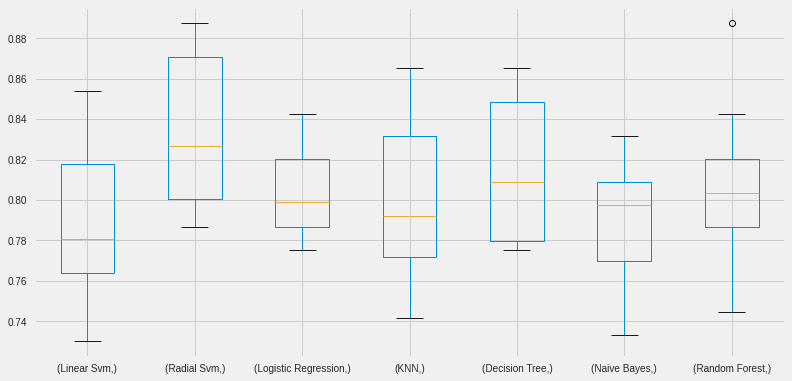

In [ ]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifier])
box.T.boxplot()

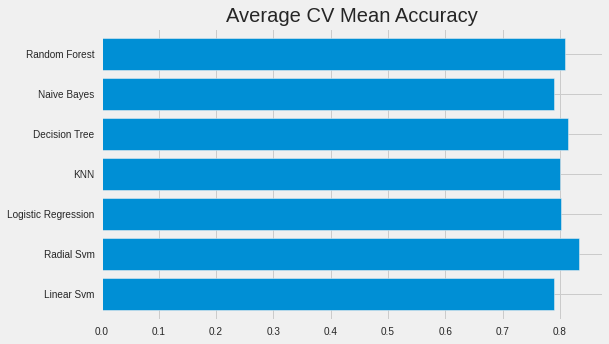

In [ ]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

- The classification accuracy acn be somtimes misleading due to imbalance.
- We can get a summarized result with the help of confusion matrix, which shows where did the model go wrong, or which class did the model predict wrong.

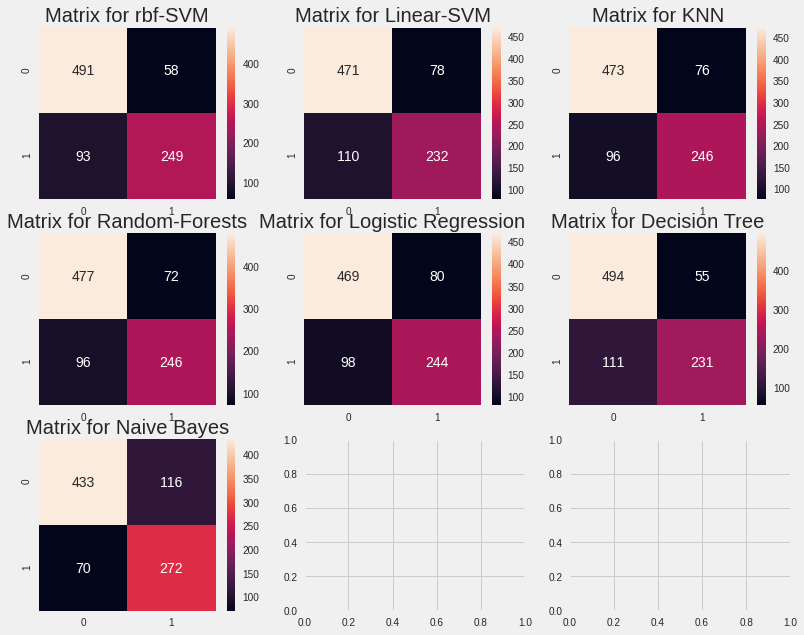

In [ ]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_curve, recall_score, f1_score